# Linear Regression

- **Calculate R²**:  
    - Determines if `x` and `y` are correlated.  
    - Large values imply a strong effect.  

- **Calculate p-value**:  
    - Determines if the R² value is statistically significant.  

- **Prediction**:  
    - Use the line to predict `y` given `x`.  

---

# Logistic Regression

- **Purpose**:  
    - Predicts whether something is `True` or `False` (binary classification).  
    - Unlike linear regression, it predicts probabilities instead of continuous values.  

- **Logistic Function**:  
    - Fits an "S"-shaped logistic curve.  
    - The curve ranges from 0 to 1, representing the probability of an event (e.g., a mouse being obese based on its weight).  

- **Classification**:  
    - Although it provides probabilities, it is primarily used for classification tasks.  

- **Data Compatibility**:  
    - Works with both continuous and discrete data, similar to linear regression.  

- **Wald's Test**:  
    - Used to determine how much a feature affects the prediction.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Description

This dataset is a toy dataset designed to predict whether an adult would purchase a vehicle or not using logistic regression. The dataset contains the following features:

- **User ID**: A unique identifier for each individual.
- **Gender**: The gender of the individual (Male/Female).
- **Age**: The age of the individual in years.
- **EstimatedSalary**: The estimated annual salary of the individual.
- **Purchased**: The target variable indicating whether the individual purchased a vehicle (1 for Yes, 0 for No).

The dataset is well-suited for binary classification tasks and serves as a simple example for applying logistic regression to predict purchasing behavior based on age and salary.

In [2]:
df = pd.read_csv("logit classification.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
clf = LogisticRegression()

X = df.iloc[:,2:4] #Since only age and Salary will affect the purchase 
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state= 0)
clf.fit(X_train, y_train)



LogisticRegression()

<Axes: xlabel='Age', ylabel='Purchased'>

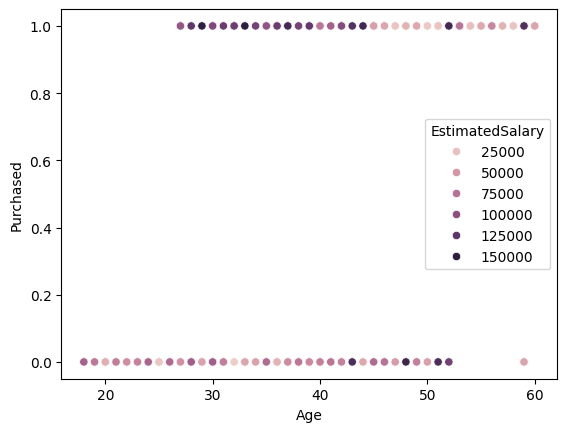

In [4]:
#Visualizing the data
sns.scatterplot(x = X_train["Age"], y = y_train, hue = X["EstimatedSalary"])

<Axes: xlabel='Age', ylabel='Purchased'>

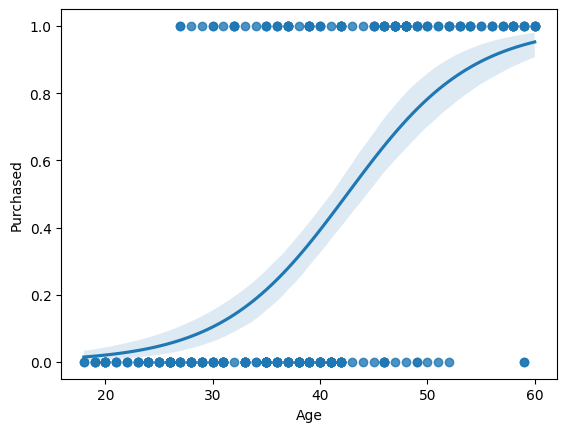

In [5]:
#Visualizing the S-curve of logistic regression for one of the features that is age
sns.regplot(x = X_train["Age"], y = y_train, logistic= True)

<Axes: xlabel='EstimatedSalary', ylabel='Purchased'>

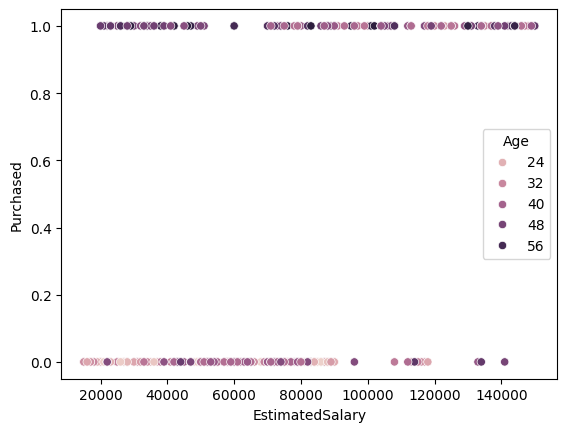

In [6]:
sns.scatterplot(x = X["EstimatedSalary"], y = y, hue = X["Age"])

<Axes: xlabel='EstimatedSalary', ylabel='Purchased'>

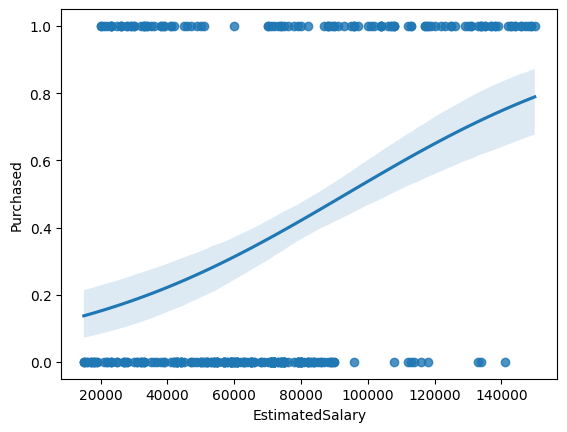

In [7]:
#Visualizing the S-curve of logistic regression for one of the features that is age

sns.regplot(x = X_train["EstimatedSalary"], y = y_train, logistic = True)

In [8]:
#predicting the unseen data using the fitted model

y_pred = clf.predict(X_test)

In [9]:
#comparing the predicted values 

df2 = X_test
df2["Actual_Data"], df2["Predicted_Data"] = y_test, y_pred
df2

,Age,EstimatedSalary,Actual_Data,Predicted_Data
132,30,87000,0,0
309,38,50000,0,0
341,35,75000,0,0
196,30,79000,0,0
246,35,50000,0,0
...,...,...,...,...
14,18,82000,0,0
363,42,79000,0,1
304,40,60000,0,0
361,53,34000,1,1


In [10]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
cm

array([[56,  2],
       [ 5, 17]])

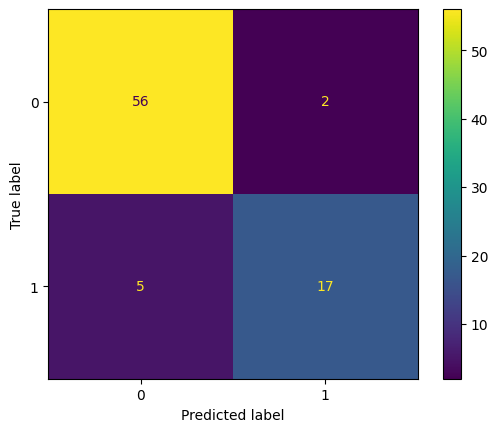

In [11]:
#Visualizing the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()


In [12]:
#Accuracy Score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score : {accuracy}")

Accuracy Score : 0.9125


In [13]:
#classificaion report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80



In [20]:
#Predicting future data from the fitted model. The model has an accuracy of 91.25%

future_data = pd.read_csv("final1.csv")
copy = future_data
X_future = future_data.iloc[:,3:5]
y_future = clf.predict(X_future)
copy["purchase or not"] = y_future
copy["purchase or not"] = copy["purchase or not"].map({0 : "No", 1 : "Yes"})

In [21]:
future_data

,Unnamed: 0,User ID,Gender,Age,EstimatedSalary,purchase or not
0,0,15724611,Male,45,60000,Yes
1,1,15725621,Female,79,64000,Yes
2,2,15725622,Male,23,78000,No
3,3,15720611,Female,34,45000,No
4,4,15588044,Male,29,76000,No
5,5,15746039,Female,70,89000,Yes
6,6,15704887,Male,86,120000,Yes
7,7,15746009,Female,46,23000,No
8,8,15876009,Male,32,70000,No
9,9,15886009,Female,100,90000,Yes
